In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

In [2]:
# Load the credit card transaction data 
df = pd.read_excel(r'C:\Users\KABYADE\Desktop\Fraud_ML\dataset\preprocessing_data.xlsx')
df.head(2)

,V1,V2,V3,V4,V9,V10,V12,V13,V16,V19,...,V7_month,V7_day,V23_month,V23_day,V8_month,V8_day,V6_year,V7_year,V23_year,V8_year
0,4,2,23,1,410878,715848.0,19,2976,44,20339,...,0.654861,-1,-1.0,-0.5,0.959493,-0.978148,2009,2011,2009,2009
1,4,2,23,1,187304,252113.0,19,2976,44,1339,...,0.959493,-1,-1.0,-0.5,0.959493,-0.500000,2009,2011,2009,2009


ALGO Test Random Forest 

In [6]:
#REMOVE due to fixed value prb
df.drop(['V7_day','V6_day'], axis=1, inplace=True)

# Split the data into features and target variable
X = df.drop("CLASS", axis=1)
y = df["CLASS"]

X = X.values
y = y.values


In [4]:
import seaborn as sns
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [7]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [9]:
# predictions
yPred = rfc.predict(X_test)

In [10]:
#n_outliers = len(fraud)

n_errors = (yPred != y_test).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9715260744374533
The precision is 0.996618321184339
The recall is 0.9460693394207448
The F1-Score is 0.9706861848124428
The Matthews correlation coefficient is0.9442493717771362


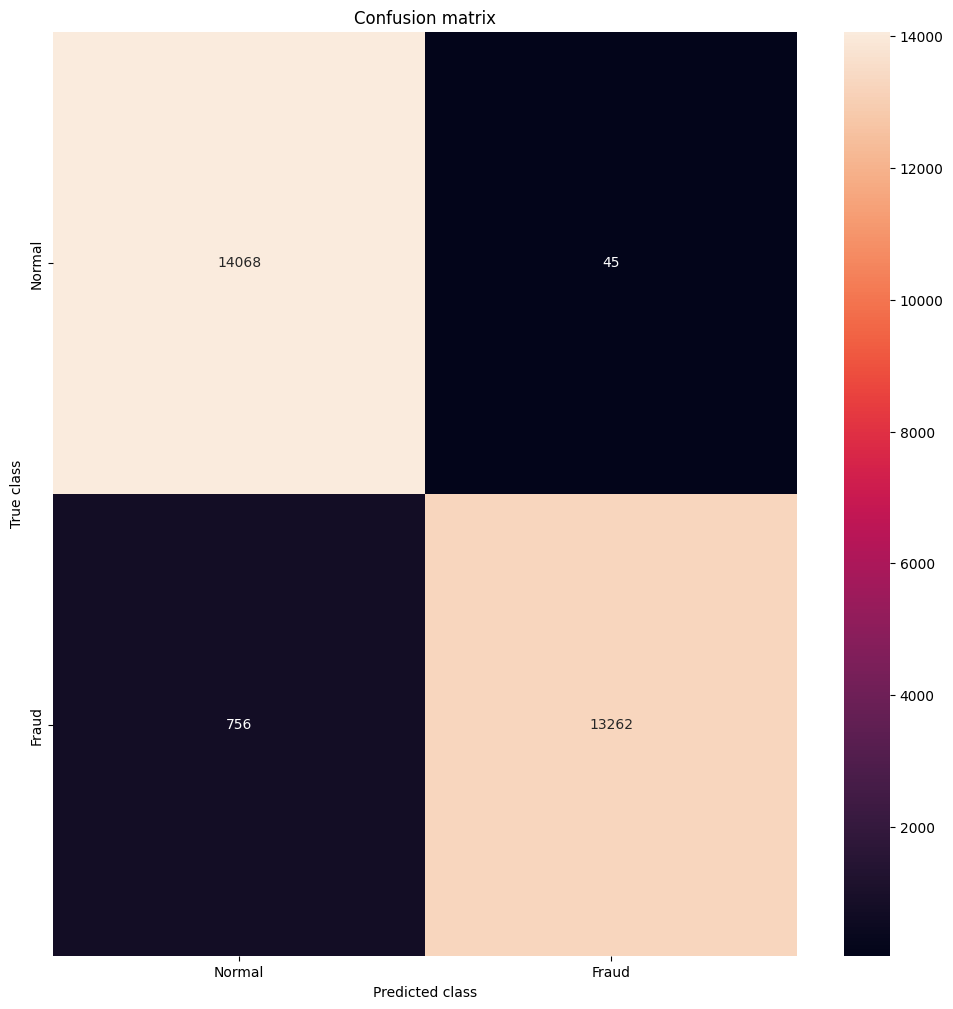

In [11]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [13]:
# Afficher les résultats
#print("Prédictions:", yPred)

anomalies = np.where(yPred == 1)
print("Anomalies:", anomalies)

Anomalies: (array([   0,    1,    6, ..., 3282, 3283, 3284], dtype=int64),)


In [ ]:
# Manual chec
j=0
for val in yPred:
    if val==1:
        print(str(j)+" ",val)
    j=j+1

    #print(df.iloc[index])

In [15]:
import joblib

# save
joblib.dump(rfc, "./random_forest.joblib")

['./random_forest.joblib']

In [16]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.joblib")

In [21]:
test=[139,265803.35,0.00,0.00,751669.39,1017472.74, 0 , 1,0,0,0 ,0 ]
test1=[319,1033878.67,1033878.67,0.0,0.0,0.0,0,0,0,0,1,0]

In [22]:
to_predict = np.array(test1).reshape(1,12)
to_predict

array([[3.19000000e+02, 1.03387867e+06, 1.03387867e+06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [23]:
loaded_rf.predict(to_predict) 

array([1], dtype=int64)

In [20]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(rfc, open("model.pkl","wb"))